> **SOMETIMES THE QUESTIONS ARE COMPLICATED AND THE ANSWERS ARE SIMPLE **

>*Dr. Seuss*

## Coin Toss

You toss a coin 30 times and see head 24 times. Is it a fair coin?

**Hypothesis 1**: Tossing a fair coin will get you 15 heads in 30 tosses. This coin is biased

**Hypothesis 2**: Come on, even a fair coin could show 24 heads in 30 tosses. This is just by chance

#### Statistical Method

P(H) = **.5**

P(HH) = **.25**

P(THH) = **.33** (Are these in any order? Or in this specific order? If they're any order, I calculated it as .5 because when you flip a coin two times, there is a 66.66 percent chance that it will land on a combination of HH or TH (the only other possibility is TT). Then multiply that by .5 to get the necessary last side, and a probability of .33. If they're in this specific order, I multiply the probability of each individual event occurring to get .125)

Now, slightly tougher : P(2H, 1T) = **.33** again, if this is "pick 2H, 1T" rather than "probability of two heads, one tail in that order" -- see my reasoning above. 

Generalizing, 

<img style="float: left;" src="img/binomial.gif">

<br>
<br>
<br>
<br>


**What is the probability of getting 24 heads in 30 tosses ?**

It is the probability of getting heads 24 times or more. 

#### Hacker's Approach

Simulation. Run the experiment 100,000 times. Find the percentage of times the experiment returned 24 or more heads. If it is more than 5%, we conclude that the coin is biased. 

In [1]:
# Let's try running the experiment one time. If you see any functions you don't recognize, check for documentation/ask Google!
# Try running this cell multiple times to see how the output changes

import numpy as np  

total_tosses = 30
num_heads = 24

#0 is tail. 1 is heads. Generate one experiment
experiment = np.random.randint(0,2,total_tosses)
print("Data of the Experiment:", experiment)
#Find the number of heads
print("Heads in the Experiment:", experiment[experiment==1]) #This will give all the heads in the array
head_count = experiment[experiment==1].shape[0] #This will get the count of heads in the array
print("Number of heads in the experiment:", head_count)

Data of the Experiment: [1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0]
Heads in the Experiment: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number of heads in the experiment: 21


In [46]:
# Now, let's try running the above experiment 100 times.
# Write a function that puts the above code in a loop.
# Every loop should run one trial of 30 coin flips.
# Your function should take 1 input (times_to_repeat) that specifies how many times to repeat the experiment.
# Your function should return an output array (head_count) that lists the number of heads in each trial.

def coin_toss_experiment(times_to_repeat): 
    i = 0
    head_count = []
    while i < times_to_repeat:
        experiment = np.random.randint(0,2, total_tosses)
        count = experiment[experiment==1].shape[0]
        head_count.append(count)
        i += 1
    return np.array(head_count)

In [47]:
head_count = coin_toss_experiment(100)

In [48]:
head_count[:10] 

array([13, 12, 17, 15, 16, 17, 18, 16, 13, 17])

In [49]:
#Let's plot the above distribution
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

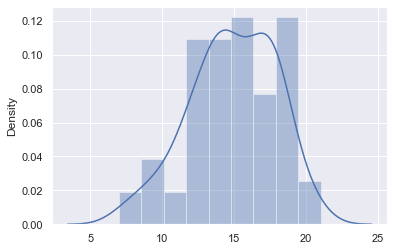

In [14]:
sns.distplot(head_count, kde=True)

**Exercise**: Try setting `kde=True` in the above cell and observe what happens

In [25]:
#Number of times the experiment returned 24 heads.
head_count[head_count>=24]

array([], dtype=int64)

In [27]:
print("No of times experiment returned 24 heads or more:", head_count[head_count>=24].shape[0])
print("% of times with 24 or more heads: ", head_count[head_count>=24].shape[0]/float(head_count.shape[0])*100)

No of times experiment returned 24 heads or more: 0
% of times with 24 or more heads:  0.0


####  Exercise: Repeat the experiment 100,000 times. 

In [43]:
#What % of experiments out of 100,000 have 24 or more heads?
def coin_toss_experiment2(times_to_repeat): 
    i = 0
    head_count2 = []
    while i < times_to_repeat:
        experiment = np.random.randint(0,2, total_tosses)
        count = experiment[experiment==1].shape[0]
        head_count2.append(count)
        i += 1
    return np.array(head_count2)

head_count2 = coin_toss_experiment2(100000)

In [44]:
head_count2[head_count2>=24]

array([25, 25, 24, 25, 24, 26, 24, 24, 24, 24, 24, 25, 24, 24, 24, 24, 24,
       24, 25, 25, 24, 24, 24, 25, 24, 24, 24, 24, 24, 24, 25, 24, 24, 25,
       24, 24, 25, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 24, 24, 25, 24,
       24, 24])

In [45]:
print("No of times experiment returned 24 heads or more:", head_count2[head_count2>=24].shape[0])
print("% of times with 24 or more heads: ", head_count2[head_count2>=24].shape[0]/float(head_count2.shape[0])*100)

No of times experiment returned 24 heads or more: 53
% of times with 24 or more heads:  0.053


# Is the coin fair?

In [ ]:
#What do you think?

# Because the coin returns 24 heads or more 5.3% of the time, and our overall p value was set to .05, we cannot reject the null hypothesis that this coin is a fair coin. 